In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE

def split_features_labels(data):
  print("split_features")
  X = data.drop(columns=['type'])
  y = data['type']
  return X,y

def balance_data(X_train, y_train):
    over = SMOTE(sampling_strategy=0.8, random_state=42)
    X_res, y_res = over.fit_resample(X_train, y_train)
    return X_res, y_res

def sampling(X, y):
    print("Sampling data...")
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
    train_index, test_index = next(sss.split(X, y))
    scaler = MinMaxScaler()
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_balanced, y_train_balanced = balance_data(X_train, y_train)
    X_train_scaled = scaler.fit_transform(X_train_balanced)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train_balanced, y_test

def create_model(X_train, y_train):

    #best_svc_params, best_lr_params, best_rf_params = hyperparameter_tuning(X_train, y_train)

    estimators = [('SVM model', LinearSVC(random_state=42, max_iter=10000, class_weight='balanced', dual='auto')),
                  ('logistic regression', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))]

    stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
    print("model created")

    return stacking

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def load_data(paths):
  data = pd.concat([pd.read_csv(path) for path in paths])
  return data

data = load_data([
        '/content/gdrive/MyDrive/N-BaIoT/csv_files/1_cleaned_dataset.csv',
        '/content/gdrive/MyDrive/N-BaIoT/csv_files/2_cleaned_dataset.csv',
        '/content/gdrive/MyDrive/N-BaIoT/csv_files/3_cleaned_dataset.csv',
        '/content/gdrive/MyDrive/N-BaIoT/csv_files/4_cleaned_dataset.csv',
        '/content/gdrive/MyDrive/N-BaIoT/csv_files/5_cleaned_dataset.csv',
        '/content/gdrive/MyDrive/N-BaIoT/csv_files/6_cleaned_dataset.csv',
        '/content/gdrive/MyDrive/N-BaIoT/csv_files/7_cleaned_dataset.csv',
        '/content/gdrive/MyDrive/N-BaIoT/csv_files/8_cleaned_dataset.csv',
        '/content/gdrive/MyDrive/N-BaIoT/csv_files/9_cleaned_dataset.csv'
    ])

X , y = split_features_labels(data)
X_train, X_test, y_train, y_test = sampling(X, y)







split_features
Sampling data...


In [6]:
central_model = create_model(X_train, y_train)
#central_model.fit(X_train, y_train)

#report, cm, roc_auc = evaluate(central_model, X_test, y_test)

model created


Classification Report:
               precision    recall  f1-score   support

           0       0.34      1.00      0.51     41221
           1       1.00      0.85      0.92    547216

    accuracy                           0.86    588437
   macro avg       0.67      0.93      0.71    588437
weighted avg       0.95      0.86      0.89    588437

Confusion Matrix:
 [[ 41204     17]
 [ 80519 466697]]
ROC AUC: 0.999842


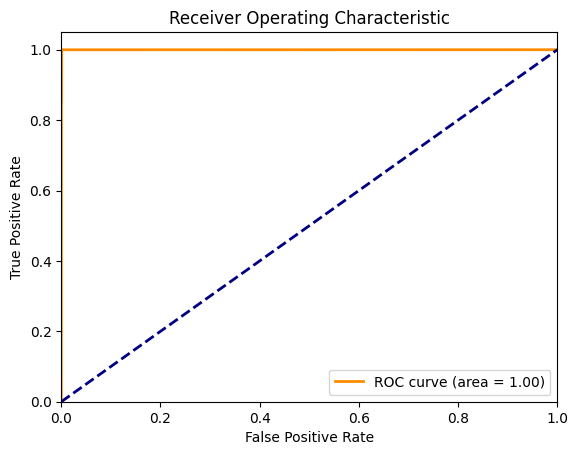

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def evaluate(central_model, X_test, y_test):
  y_true =[]
  y_pred =[]
  y_score = []


  y_pred = central_model.predict(X_test)
  y_true = y_test
  y_score = central_model.predict_proba(X_test)[:, 1]

  cm = confusion_matrix(y_true, y_pred)
  tn, fp, fn, tp = cm.ravel()

  accuracy = (accuracy_score(y_true, y_pred)*100)

  report = classification_report(y_true, y_pred)
  fpr, tpr, _ = roc_curve(y_true, y_score)
  roc_auc = auc(fpr, tpr)


  print("Classification Report:\n", report)
  print("Confusion Matrix:\n", cm)
  print("ROC AUC: {:2f}".format(roc_auc))


  #plotting curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0,1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

  """np.save('/content/gdrive/MyDrive/N-BaIoT/central_accuracy.npy',accuracy)
  np.save('/content/gdrive/MyDrive/N-BaIoT/central_report.npy',report)
  np.save('/content/gdrive/MyDrive/N-BaIoT/central_cm.npy',cm)
  np.save('/content/gdrive/MyDrive/N-BaIoT/central_roc_auc.npy',roc_auc)
"""
  return report, cm, roc_auc

central_model.fit(X_train, y_train)
report, cm, roc_auc = evaluate(central_model, X_test, y_test)